## Importing the libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading the dataset

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


## Define X by selecting only the age and EstimatedSalary, and y with purchased column

In [10]:
x = df[['Age','EstimatedSalary']]
x


,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [16]:
y= df[['Purchased']]
y


,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


## Print count of each label in Purchased column

In [17]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

## Print Correlation of each feature in the dataset

In [19]:
df.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


# First: Logistic Regression model

## Split the dataset into Training set and Test set with test_size = 0.25 and random_state = 0

In [21]:
from sklearn.model_selection import train_test_split

## Train the model with random_state = 0

In [69]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)


In [70]:

from sklearn.linear_model import LogisticRegression

In [71]:
logreg = LogisticRegression()

In [72]:
logreg.fit(X_train,y_train)


LogisticRegression()

In [73]:
y_pred=logreg.predict(X_test)

## Print the prediction results

In [74]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Create dataframe with the Actual Purchased and Predict Purchased

In [75]:
df2= pd.DataFrame({"Age": X_test.Age , "EstimatedSalary": X_test.EstimatedSalary, "Actual_Purchased":y_test.Purchased , 
                   "Predict_Purchased":y_pred}  )

df2

,Age,EstimatedSalary,Actual_Purchased,Predict_Purchased
132,30,87000,0,0
309,38,50000,0,0
341,35,75000,0,0
196,30,79000,0,0
246,35,50000,0,0
...,...,...,...,...
146,27,96000,1,0
135,23,63000,0,0
390,48,33000,1,0
264,48,90000,1,0


In [76]:
(df2["Actual_Purchased"]==df2["Predict_Purchased"]).value_counts()

True     68
False    32
dtype: int64

## Print Confusion Matrix and classification_report

In [77]:
from sklearn.metrics import  confusion_matrix, classification_report


In [78]:
print(confusion_matrix(y_test ,y_pred))


[[68  0]
 [32  0]]


In [79]:
print(classification_report(y_test, y_pred ))


              precision    recall  f1-score   support

           0       0.68      1.00      0.81        68
           1       0.00      0.00      0.00        32

    accuracy                           0.68       100
   macro avg       0.34      0.50      0.40       100
weighted avg       0.46      0.68      0.55       100



## Use StandardScaler() to improved performance and re-train your model

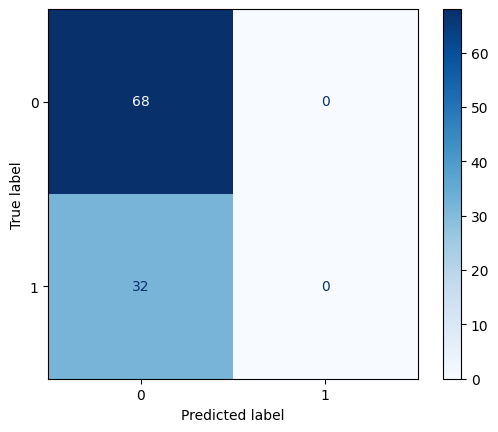

In [80]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg, X_test , y_test , cmap='Blues');
plt.show()

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [86]:
x_train_scaler = scaler.fit_transform(X_train)
x_test_scaler = scaler.fit_transform(X_test)

In [87]:
logreg.fit(x_train_scaler, y_train)

LogisticRegression()

In [88]:
y_pred2 = logreg.predict(x_test_scaler)

In [89]:
print(classification_report(y_test,y_pred2 ))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        68
           1       0.83      0.75      0.79        32

    accuracy                           0.87       100
   macro avg       0.86      0.84      0.85       100
weighted avg       0.87      0.87      0.87       100



## Try to Predicting a new result - e.g: person with Age = 30 and Salary = 90,000

In [90]:
result =logreg.predict(scaler.transform([[30 , 90000]]))
print(result)

[0]


## Try to Predicting a new result - e.g: person with Age = 40 and Salary = 90,000

In [91]:
result2= logreg.predict(scaler.transform([[40 , 90000]]))
print(result2)

[1]
